In [2]:
import pandas as pd

data = pd.read_csv('consolidated_data.csv')

print(data.info())
data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10 non-null     int64  
 1   transaction_id             10 non-null     int64  
 2   customer_name_transaction  10 non-null     object 
 3   amount                     10 non-null     int64  
 4   transaction_date           10 non-null     object 
 5   matched_name               7 non-null      object 
 6   customer_id                7 non-null      float64
 7   customer_name_customer     7 non-null      object 
 8   email                      7 non-null      object 
dtypes: float64(1), int64(3), object(5)
memory usage: 848.0+ bytes
None


,Unnamed: 0,transaction_id,customer_name_transaction,amount,transaction_date,matched_name,customer_id,customer_name_customer,email
0,0,101,John Smith,784,2023-01-31,John Smith,1.0,John Smith,john.smith@email.com
1,1,102,Jane Doe,659,2023-02-28,Jane Doe,2.0,Jane Doe,jane.doe@email.com
2,2,103,Michael Jonson,729,2023-03-31,NaN,NaN,NaN,NaN
3,3,104,Chris Lee,292,2023-04-30,Chris Lee,4.0,Chris Lee,c.lee@email.com
4,4,105,Katherine Davis,935,2023-05-31,Katherine Davis,5.0,Katherine Davis,k.davis@email.com
5,5,106,David Martinez,863,2023-06-30,David Martinez,6.0,David Martinez,d.martinez@email.com
6,6,107,Sarah Brown,807,2023-07-31,NaN,NaN,NaN,NaN
7,7,108,James Wilson,459,2023-08-31,James Wilson,8.0,James Wilson,j.wilson@email.com
8,8,109,Patricia Taylor,109,2023-09-30,Patricia Taylor,9.0,Patricia Taylor,p.taylor@email.com
9,9,110,Robet Miller,823,2023-10-31,NaN,NaN,NaN,NaN


In [3]:
print(data.isnull().sum())


Unnamed: 0                   0
transaction_id               0
customer_name_transaction    0
amount                       0
transaction_date             0
matched_name                 3
customer_id                  3
customer_name_customer       3
email                        3
dtype: int64


In [4]:
print(data.describe())


       Unnamed: 0  transaction_id      amount  customer_id
count    10.00000        10.00000   10.000000      7.00000
mean      4.50000       105.50000  646.000000      5.00000
std       3.02765         3.02765  271.337428      2.94392
min       0.00000       101.00000  109.000000      1.00000
25%       2.25000       103.25000  509.000000      3.00000
50%       4.50000       105.50000  756.500000      5.00000
75%       6.75000       107.75000  819.000000      7.00000
max       9.00000       110.00000  935.000000      9.00000


In [6]:
unique_customers = data['customer_id'].nunique()
print(f"Customers: {unique_customers}")


Customers: 7


In [7]:
total_by_customer = data.groupby('customer_name_customer')['amount'].sum().sort_values(ascending=False)
print(total_by_customer)


customer_name_customer
Katherine Davis    935
David Martinez     863
John Smith         784
Jane Doe           659
James Wilson       459
Chris Lee          292
Patricia Taylor    109
Name: amount, dtype: int64


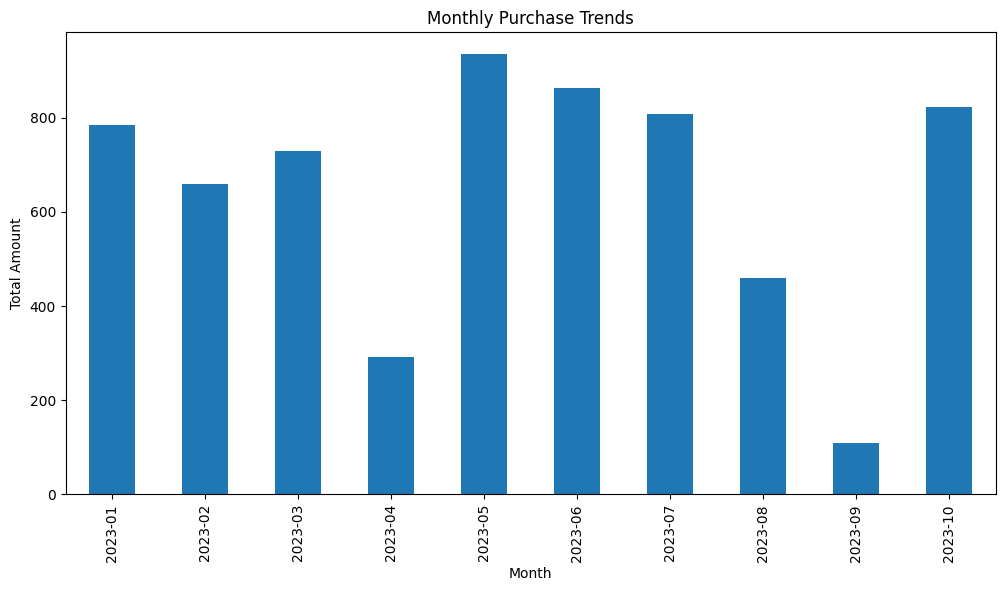

In [8]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
monthly_trends = data.groupby(data['transaction_date'].dt.to_period('M'))['amount'].sum()


import matplotlib.pyplot as plt
monthly_trends.plot(kind='bar', figsize=(12, 6), title="Monthly Purchase Trends")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()


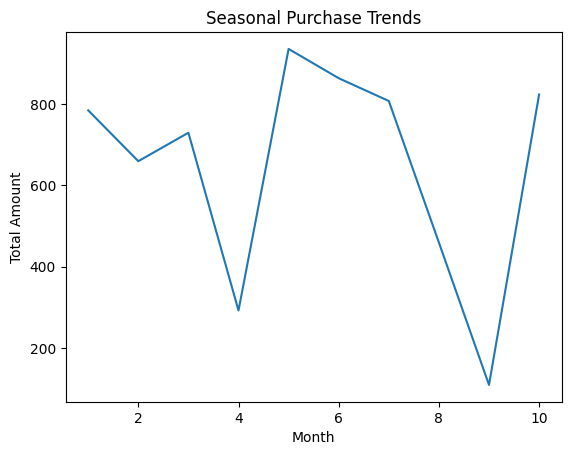

In [11]:
data['month'] = data['transaction_date'].dt.month
seasonal_trends = data.groupby('month')['amount'].sum()
seasonal_trends.plot(kind='line', title="Seasonal Purchase Trends")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()

